In [201]:
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # Display all expressions in cells

## Load the dataset and show an overview

In [179]:
import pandas as pd

data = pd.read_csv('./agaricus-lepiota.data')
data.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Feature classes

| edibility | cap-shape | cap-surface | cap-color | bruises? | odor | gill-attachment | gill-spacing | gill-size | gill-color | stalk-shape | stalk-root | stalk-surface-above-ring | stalk-surface-below-ring | stalk-color-above-ring | stalk-color-below-ring | veil-type | veil-color | ring-number | ring-type | spore-print-color | population | habitat |
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
| edible=e<br>poisonous=p | bell=b<br>conical=c<br>convex=x<br>flat=f<br>knobbed=k<br>sunken=s | fibrous=f<br>grooves=g<br>scaly=y<br>smooth=s | brown=n<br>buff=b<br>cinnamon=c<br>gray=g<br>green=r<br>pink=p<br>purple=u<br>red=e<br>white=w<br>yellow=y | bruises=t<br>no=f | almond=a<br>anise=l<br>creosote=c<br>fishy=y<br>foul=f<br>musty=m<br>none=n<br>pungent=p<br>spicy=s | attached=a<br>descending=d<br>free=f<br>notched=n | close=c<br>crowded=w<br>distant=d | broad=b<br>narrow=n | black=k<br>brown=n<br>buff=b<br>chocolate=h<br>gray=g<br>green=r<br>orange=o<br>pink=p<br>purple=u<br>red=e<br>white=w<br>yellow=y | enlarging=e<br>tapering=t | bulbous=b<br>club=c<br>cup=u<br>equal=e<br>rhizomorphs=z<br>rooted=r<br>missing=? | fibrous=f<br>scaly=y<br>silky=k<br>smooth=s | fibrous=f<br>scaly=y<br>silky=k<br>smooth=s | brown=n<br>buff=b<br>cinnamon=c<br>gray=g<br>orange=o<br>pink=p<br>red=e<br>white=w<br>yellow=y | brown=n<br>buff=b<br>cinnamon=c<br>gray=g<br>orange=o<br>pink=p<br>red=e<br>white=w<br>yellow=y | partial=p<br>universal=u | brown=n<br>orange=o<br>white=w<br>yellow=y | none=n<br>one=o<br>two=t | cobwebby=c<br>evanescent=e<br>flaring=f<br>large=l<br>none=n<br>pendant=p<br>sheathing=s<br>zone=z | black=k<br>brown=n<br>buff=b<br>chocolate=h<br>green=r<br>orange=o<br>purple=u<br>white=w<br>yellow=y | abundant=a<br>clustered=c<br>numerous=n<br>scattered=s<br>several=v<br>solitary=y | grasses=g<br>leaves=l<br>meadows=m<br>paths=p<br>urban=u<br>waste=w<br>woods=d |


## Converting features to dummy-encoded variables
We can convert features to dummy-encoded variables by using pandas' get_dummies function.

In [204]:
# Dummy-encoded feature 'odor' for the first 4 instances:
pd.get_dummies(data['odor']).iloc[:4]

# Dummy-encode all features:
pd.get_dummies(data).iloc[:4]  # Select first 4 rows

,a,c,f,l,m,n,p,s,y
0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0


,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


## Feature space visualized
Columns are all the dummy-encoded features, meaning values are either 0 or 1. Each row is an instance of the data (a mushroom per row).

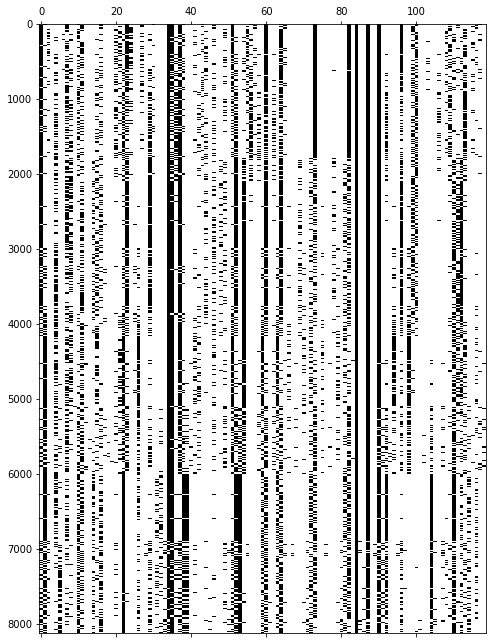

In [205]:
import matplotlib.pyplot as plt

# Get dummy encoded features as ndarray
vectorized = pd.get_dummies(data).values

fig, ax = plt.subplots(1, 1)
ax.spy(vectorized)
ax.set_aspect(0.02)
fig.set_size_inches(8, 50)
plt.show()